# Taxi Trip Duration Prediction using Multiple Linear Regression

In [9]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

<h2>Data Preparation</h2>

In [10]:
data = pd.read_csv('train.csv')

In [11]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [18]:
data.shape

(1458644, 11)

In [12]:
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


Attribute Explanation:
* id : a unique identifier for each trip
* vendor_id : a code indicating the provider associated with the trip record
* pickup_datetime : date and time when the meter was engaged
* dropoff_datetime : date and time when the meter was disengaged
* passenger_count : the number of passengers in the vehicle (driver entered value) 
* pickup_longitude : the longitude where the meter was engaged
* pickup_latitude : the latitude where the meter was engaged
* dropoff_longitude : the longitude where the meter was disengaged
* dropoff_latitude : the latitude where the meter was disengaged
* store_and_fwd_flag : this flag indicates whether the trip record was held in vehicle memory or not. Y = Yes Stored, N = Not Stored
* trip_duration : duration of the trip in seconds

In [15]:
data[['pickup_datetime','dropoff_datetime']] = data[['pickup_datetime','dropoff_datetime']].astype('datetime64')

In [16]:
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')

<h2>Exploratory Data Analysis</h2>

<h4>Pair plot between numerical variable</h4>

In [ ]:
data.describe()

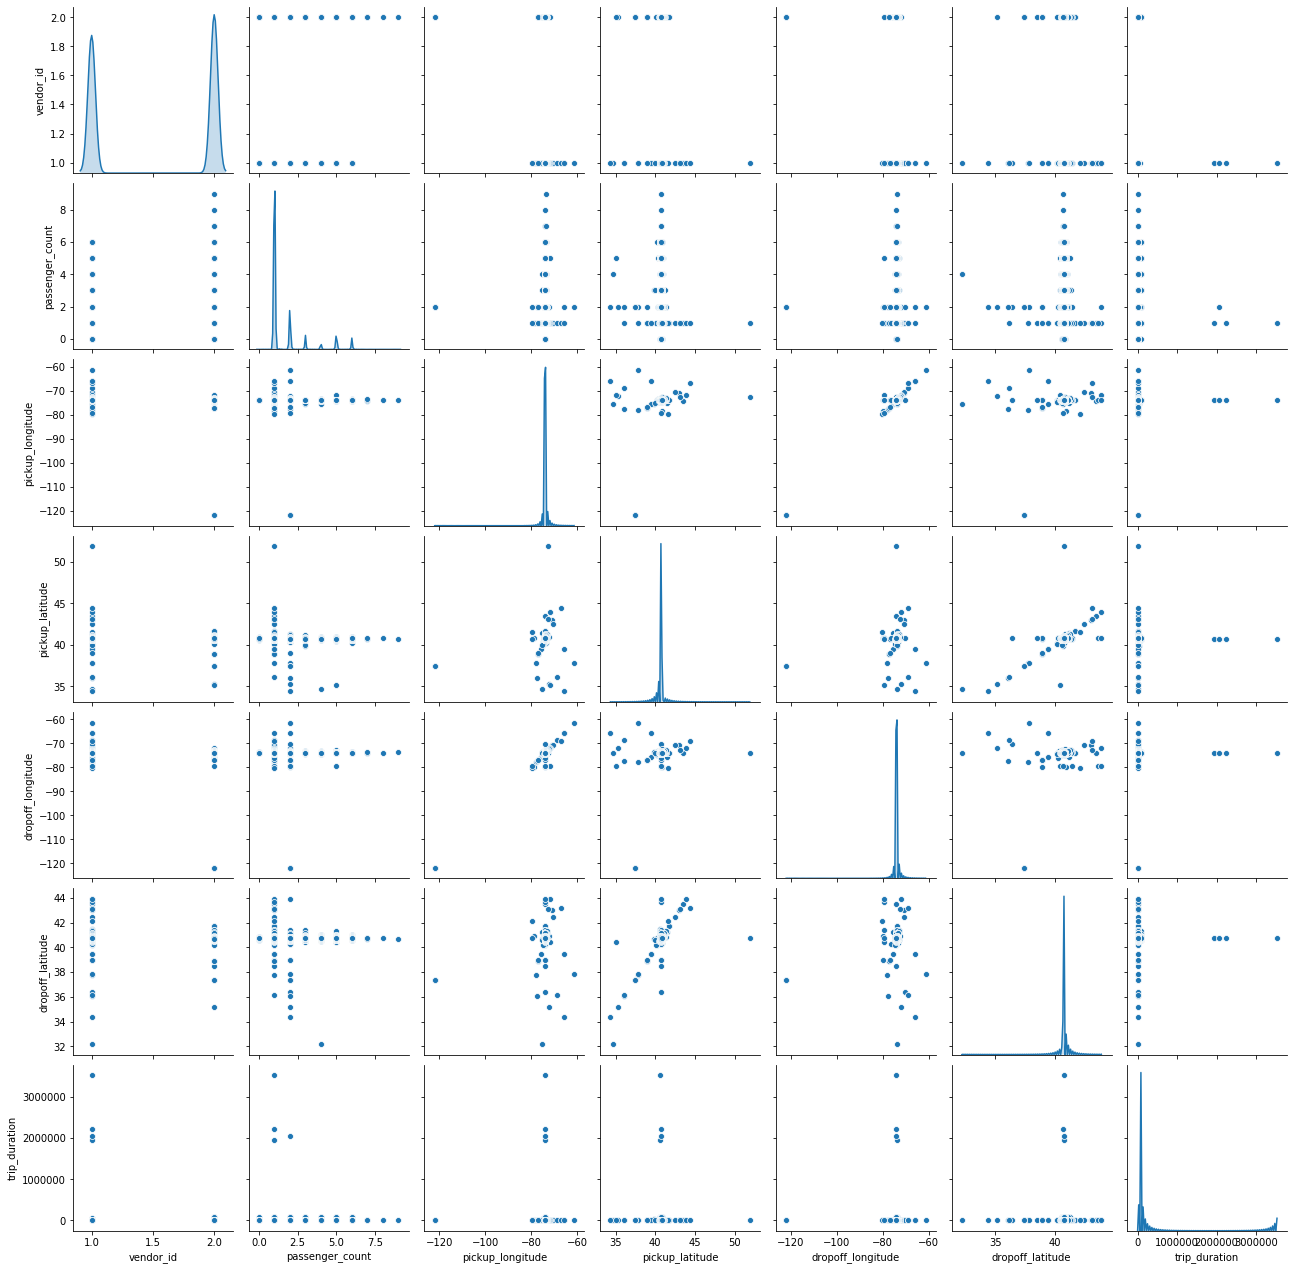

In [19]:
sns.pairplot(data, palette="husl", diag_kind = "kde")


KeyboardInterrupt



Error in callback <function flush_figures at 0x000000803FD7FC18> (for post_execute):


KeyboardInterrupt: 

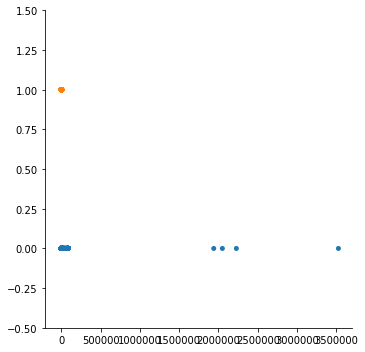

In [20]:
sns.catplot(x="trip_duration", y="store_and_fwd_flag", kind="swarm", data=data);